### Iris Classification Using Decision Tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### In this data we have 5 Columns (Features):
#### Id: which is not needed as it acts as a unique identifier for each row.
#### SepalLengthCm.
#### SepalWidthCm.
#### PetalLengthCm.
#### PetalWidthCm.

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### The data doesn't contain any duplicates or null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### The summary statistics indicates that the data has no outliers/unusual values.

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### We removed the 'Id' columns.

In [6]:
df.drop(columns=['Id'], inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
from sklearn.model_selection import train_test_split

### We split the data into features 'X' and Target 'y'.

In [9]:
X = df.iloc[:, :-1] #Features
y = df.iloc[:, -1] #Target

In [10]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Train-test split with 80% train and 20% test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn import tree

### Defining the decision tree model with maximum depth of 3.

In [14]:
DT = tree.DecisionTreeClassifier(max_depth=3)

### Fitting the model to the training data:

In [15]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Making predicitons of the training and testing data:

In [16]:
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

### Visualizing the decision tree:

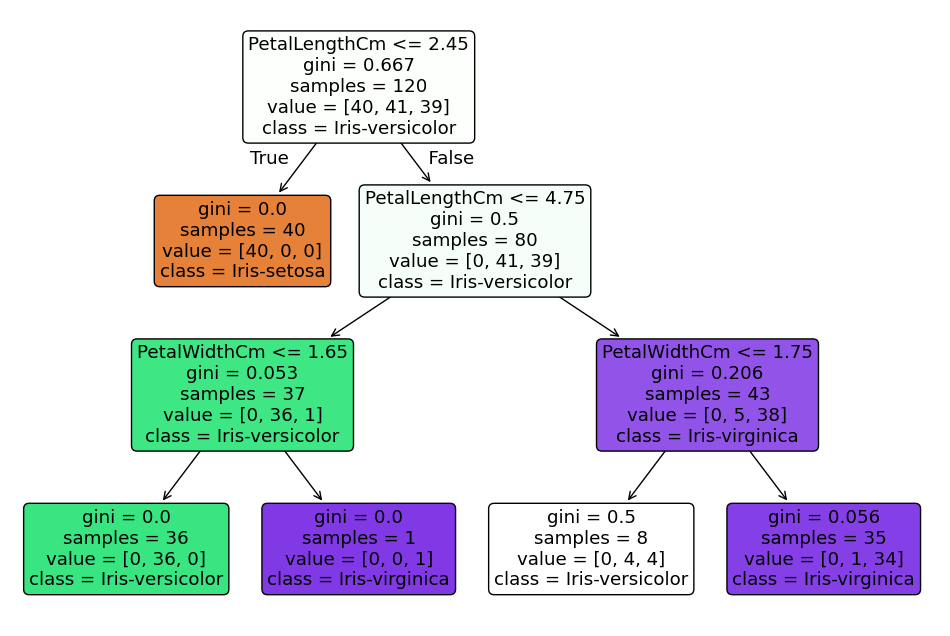

In [ ]:
feature_names = [value for value in X_train]
class_names = [str(name) for name in DT.classes_]
plt.figure(figsize=(12, 8))
tree.plot_tree(
    DT, 
    feature_names=feature_names, 
    class_names=class_names, 
    filled=True, 
    rounded=True
)
plt.show()